# <b>Introduction</b>
- Project dataset: open dataset
- Source: Kaggle (titanic full dataset)
- Objectives: Explore the data (EDA), visualize the data, identify and gain new useful feature variable, prepare and clean the data, Modelling
- ML models: Logistic Regression, K-Neighbours Classifier,  Support Vector Machine's, Decision Tree's

*Created by: Rizki Yoga Marsyamni*

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
file= 'Data/titanic_full.csv'

df=pd.read_csv(file)


## Exploratory Data Analysis (EDA)

In [208]:
df.sample(3)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
121,122,0.0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.05,...,S,1036.0,"Moore, Mr. Leonard Charles",19.0,"Kingston upon Thames, London, England",Southampton,"Hoboken, New Jersey, US",NaN,NaN,3.0
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.00,...,S,12.0,"Andrews, Mr. Thomas[60]",39.0,"Belfast, Ireland, UK",Belfast,"New York, New York, US",NaN,NaN,1.0
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,...,S,625.0,"Ali, Mr. Ahmed",24.0,"Buenos Aires, Argentina",Southampton,New York City,NaN,NaN,3.0


In [209]:
df1=df[['PassengerId', 'Survived', 'Pclass','Name','Sex','Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked']]

In [210]:
df1.shape

(1309, 12)

In [211]:
df1.columns.unique

<bound method Index.unique of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>

In [212]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [213]:
df1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [214]:
# Check Duplicated data
#df1.duplicated().sum()
#cek duplikasi data
df1.PassengerId.duplicated().sum()

0

# Checking Variable target

In [215]:
df1.Survived.unique()

array([ 0.,  1., nan])

# Basic statistics

In [216]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [217]:
df1.describe(include="O")


,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [218]:
matrix_corr=df1.corr()
matrix_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<AxesSubplot:>

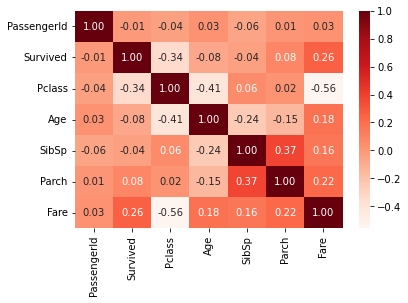

In [219]:
sns.heatmap(matrix_corr, annot=True, cmap="Reds", fmt=".2f")


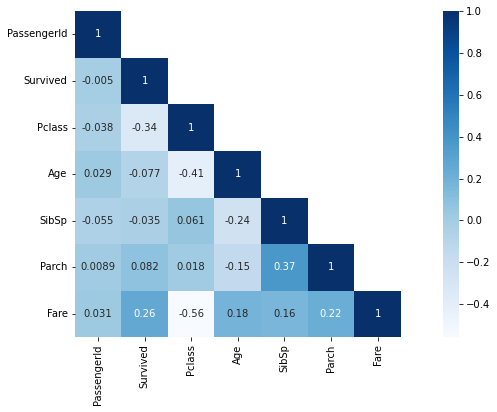

In [220]:
#Corelation matrix.
cor_mat = df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.heatmap(data=cor_mat, mask=mask, cmap="Blues", square=True, annot=True, cbar=True)
plt.show()


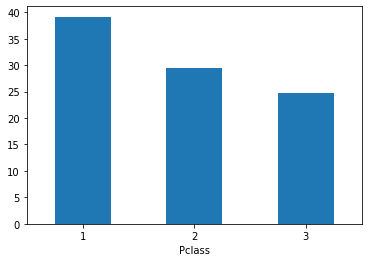

In [221]:
df1_grouped=df1.groupby(by="Pclass").mean()
df1_grouped.Age.plot.bar()
plt.xticks(rotation=0)
plt.show()

#other ways (still same, simple code)
# df1.groupby("Pclass").Age.mean().plot.bar()


In [222]:
df1_grouped=df1.groupby(by="Pclass").mean()
df1_grouped

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,672.492260,0.629630,39.159930,0.436533,0.365325,87.508992
2,671.566787,0.472826,29.506705,0.393502,0.368231,21.179196
3,640.558533,0.242363,24.816367,0.568406,0.400564,13.302889


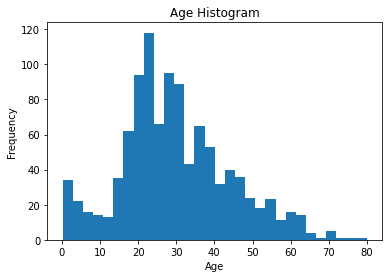

In [223]:
df1.Age.plot.hist(bins=30)
plt.xlabel('Age')
plt.title('Age Histogram')
plt.show()

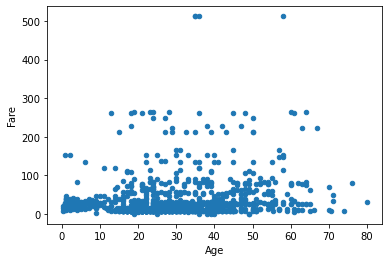

In [224]:
df1.plot.scatter(x="Age", y="Fare")
plt.show()

<AxesSubplot:>

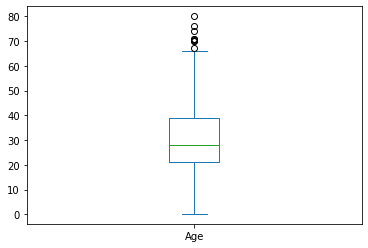

In [225]:
# Simple Outlier Check
df1.Age.plot.box()


# Explore Variables

## Categorical Data

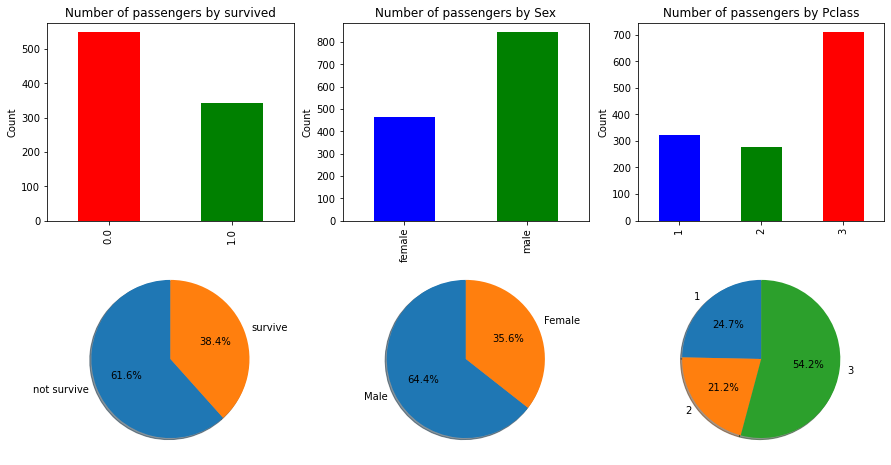

In [226]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

#subplot 1
df1['Survived'].value_counts().sort_index().plot.bar(color=['red', 'green'], ax=ax[0][0])
ax[0][0].set_title('Number of passengers by survived')
ax[0][0].set_ylabel("Count")


#subplot 2
df1['Sex'].value_counts().sort_index().plot.bar(color=['blue', 'green'], ax=ax[0][1])
ax[0][1].set_title('Number of passengers by Sex')
ax[0][1].set_ylabel("Count")

#subplot 3
df1['Pclass'].value_counts().sort_index().plot.bar(color=['blue', 'green', 'red'], ax=ax[0][2])
ax[0][2].set_title('Number of passengers by Pclass')
ax[0][2].set_ylabel("Count")


#subplot 4
ax[1][0].pie(x=df1.Survived.value_counts(), labels=["not survive", "survive"], autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 5
ax[1][1].pie(x=df1.Sex.value_counts(), labels=["Male", "Female"], autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 6
ax[1][2].pie(x=df1.Pclass.value_counts().sort_index(), labels=['1','2','3'], autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()



# Categorical data vs target (dependent)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

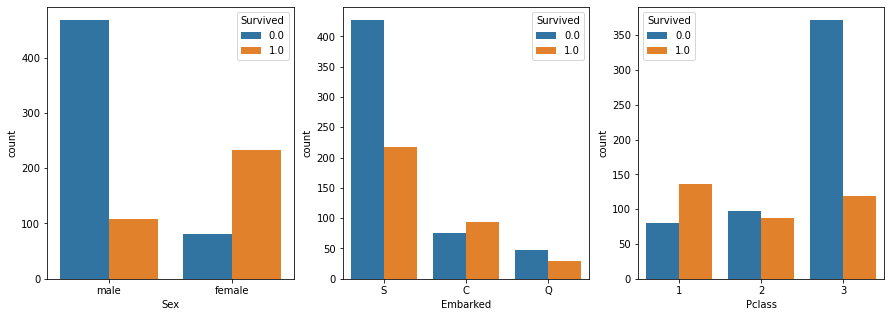

In [227]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#subplot 1
sns.countplot(data=df1, x="Sex", ax=ax[0], hue="Survived")
#subplot 2
sns.countplot(data=df1, x="Embarked", ax=ax[1], hue="Survived")

#subplot 3
sns.countplot(data=df1, x="Pclass", ax=ax[2], hue="Survived")



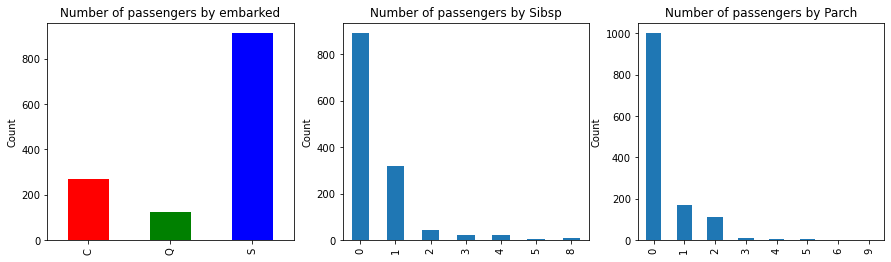

In [228]:
fig, ax=plt.subplots(1,3, figsize=(15,4))

#subplot 1
df1['Embarked'].value_counts().sort_index().plot.bar(color=['red','green', 'blue'], ax=ax[0])
ax[0].set_title('Number of passengers by embarked')
ax[0].set_ylabel("Count")

#subplot 2
df1['SibSp'].value_counts().sort_index().plot.bar(ax=ax[1])
ax[1].set_title('Number of passengers by Sibsp')
ax[1].set_ylabel("Count")

#subplot 3
df1['Parch'].value_counts().sort_index().plot.bar(ax=ax[2])
ax[2].set_title('Number of passengers by Parch')
ax[2].set_ylabel("Count")

plt.show()


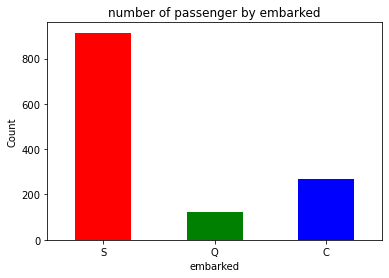

In [229]:
#versi 1 graph
df1.Embarked.value_counts().sort_index(ascending=False).plot.bar(color=['red','green','blue'])
plt.xlabel("embarked")
plt.ylabel('Count')
plt.title("number of passenger by embarked")
plt.xticks(rotation=0)
plt.show()

# Checking data distribution from age and fare

Text(0, 0.5, 'frequency')

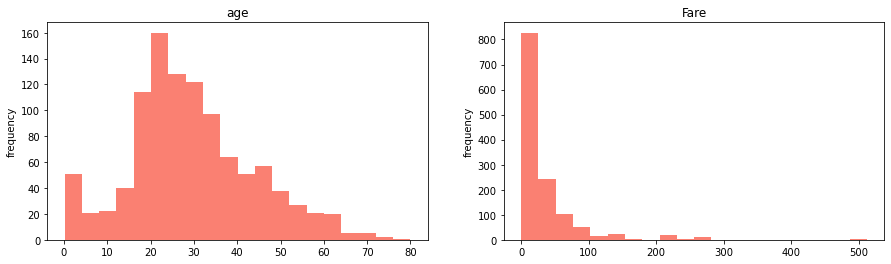

In [230]:
f, ax=plt.subplots(1,2, figsize= (15,4))

df1.Age.plot.hist(bins=20, ax=ax[0], color="salmon")
ax[0].set_title('age')
ax[0].set_ylabel("frequency")

df1.Fare.plot.hist(bins=20, ax=ax[1], color="salmon")
ax[1].set_title('Fare')
ax[1].set_ylabel("frequency")


# Check Outliers

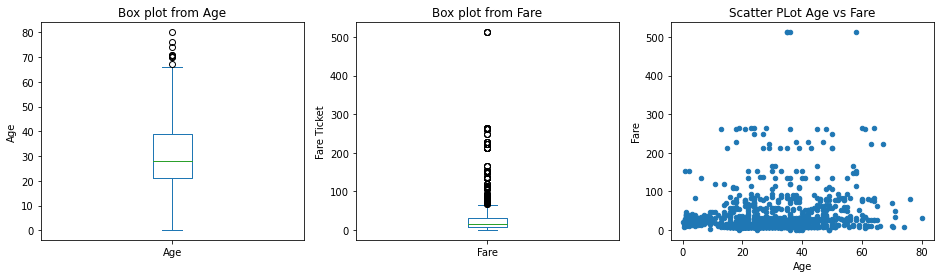

In [231]:
f, ax=plt.subplots(1,3, figsize= (16,4))

df1.Age.plot.box(ax=ax[0])
ax[0].set_ylabel('Age')
ax[0].set_title("Box plot from Age")

df1.Fare.plot.box(ax=ax[1])
ax[1].set_ylabel('Fare Ticket')
ax[1].set_title("Box plot from Fare")

df1.plot.scatter(x='Age', y='Fare',ax=ax[2])
ax[2].set_title("Scatter PLot Age vs Fare")

plt.show()

# checking outlier with plotting age and fare

<AxesSubplot:xlabel='Age', ylabel='Fare'>

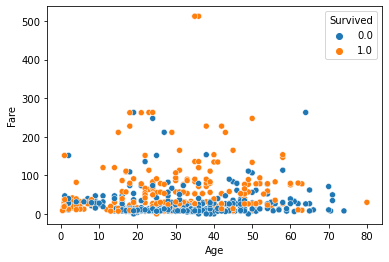

In [302]:
sns.scatterplot(data=df1, x="Age", y="Fare", hue="Survived")


# Bivariate Analysis

In [233]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for duplicated data

In [234]:
df1.duplicated().sum()

# if the data has duplicate rows and we want to remove "the whole" duplicate rows, we use:
# df1.drop.duplicates(inplace=True)

0

# Handling Missing values

In [235]:
df1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

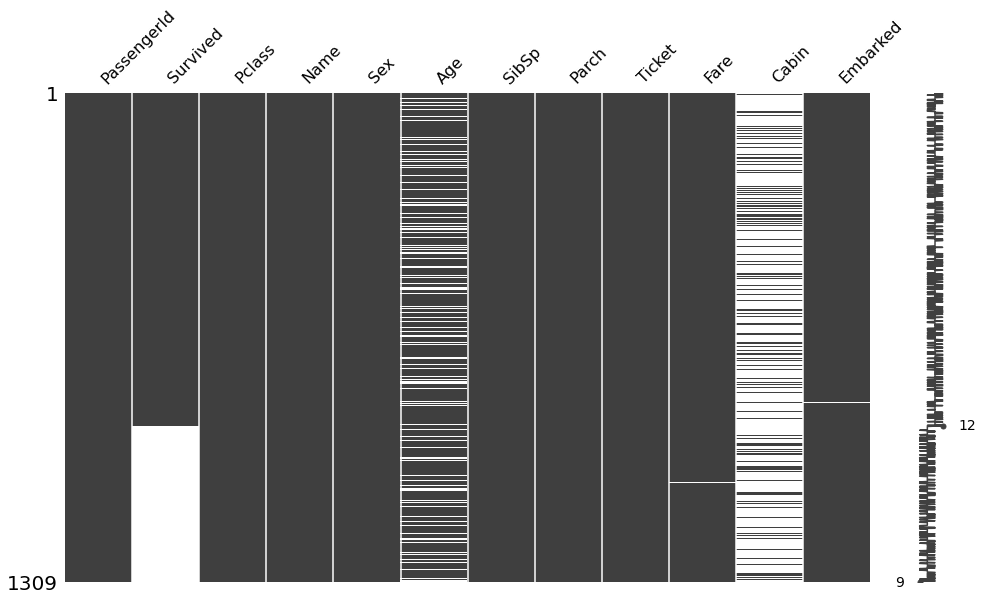

In [236]:
import missingno as msno

msno.matrix(df1, figsize=(16,9))

In [237]:
df1.dropna(subset=["Survived"], how="any", inplace=True)

C:\Users\yoga\miniconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [238]:
df1.shape

(891, 12)

<AxesSubplot:>

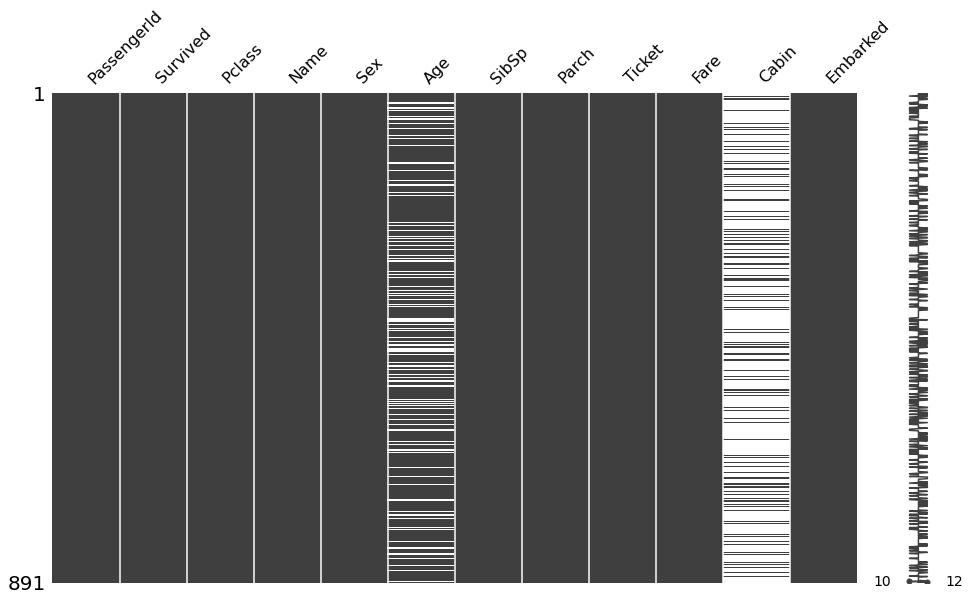

In [239]:
msno.matrix(df1, figsize=(16, 9))


<AxesSubplot:title={'center':'Distribution data from Age'}, ylabel='Frequency'>

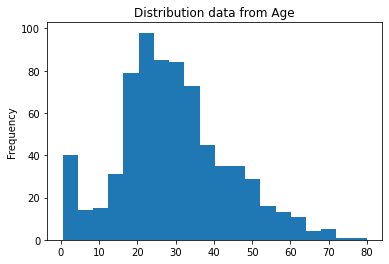

In [240]:
df1.Age.plot.hist(title= "Distribution data from Age", bins=20)

In [241]:
# Skewness check
df1.Age.skew()

0.38910778230082704

In [242]:
df1['Age_mean_uni']=df1.Age.fillna(df1.Age.mean())
df1['Age_median_uni'] = df1.Age.fillna(df1.Age.median())


C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/32814744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_mean_uni']=df1.Age.fillna(df1.Age.mean())
C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/32814744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_median_uni'] = df1.Age.fillna(df1.Age.median())


In [243]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean_uni,Age_median_uni
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


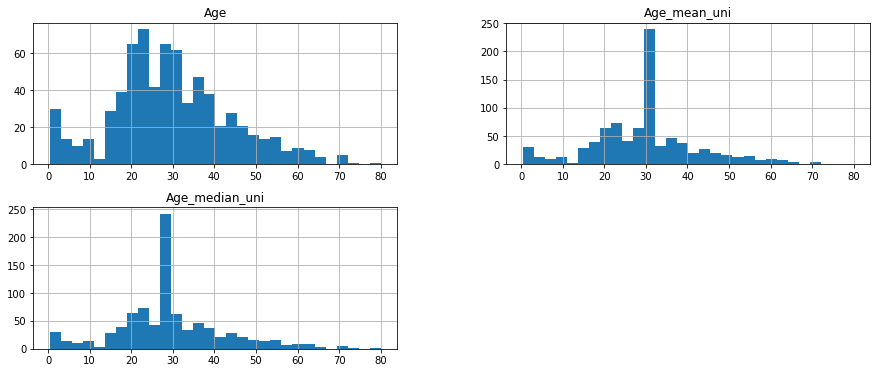

In [244]:
df1[['Age', 'Age_mean_uni', 'Age_median_uni']].hist( bins=30, figsize=(15,6))
plt.show()


In [245]:
# Skewness result
df1[['Age','Age_mean_uni','Age_median_uni']].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_median_uni    0.510245
dtype: float64

In [246]:
df_grouped=df1[['Sex','Age']].groupby(['Sex']).mean()
df_grouped

,Age
Sex,
female,27.915709
male,30.726645


In [247]:
# Input for male group

# filter condition
condition= df1['Sex']=="male" 


# mean value for man
mean_male= df_grouped.loc['male', 'Age']

# Input the data
df1.loc[condition,'Age_mean_multi']=df1.loc[condition, "Age"].fillna(mean_male)


C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [248]:
# Input for female group

# Filter the condition
condition = df1['Sex'] == "female"

# Mean value for woman
mean_female = df_grouped.loc['female', 'Age']

df1.loc[condition, 'Age_mean_multi'] = df1.loc[condition, "Age"].fillna(mean_female)


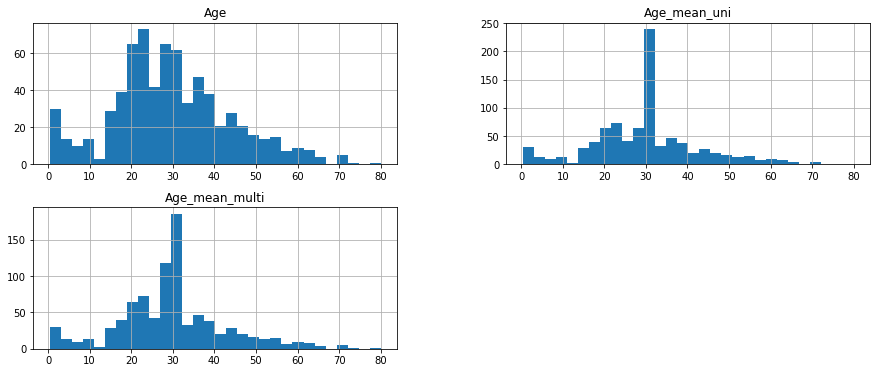

In [249]:
# The result before and after

df1[['Age','Age_mean_uni','Age_mean_multi']].hist(bins=30, figsize=(15,6))

plt.show()

In [250]:
df1[["Age","Age_mean_uni","Age_mean_multi"]].skew()

Age               0.389108
Age_mean_uni      0.434488
Age_mean_multi    0.424586
dtype: float64

Age_mean_multi skewness data provide better values. we choose this variable for next process

# Cabin Colom

In [251]:
# df1.Cabin.value_counts()
df1.Cabin.isnull().sum()

687

We drop cabin colom because to many missing values. if we still use this variable for modelling, the output peformance from model will be bias, and it's not good result.


In [252]:
df1.drop(columns="Cabin", inplace=True)

C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [253]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_mean_uni', 'Age_median_uni',
       'Age_mean_multi'],
      dtype='object')

# Embarked Column

In [254]:
# Size checking for each class
df1.Embarked.value_counts().sort_index()

C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [255]:
df1[df1.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,38.0,38.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,62.0,62.0


Embarked column maybe have relation with Ticket column

In [256]:
# Checking the pattern
# Use "113" to check the pattern
df_113=df1.loc[df1.Ticket.str.match('^113'),:]
df_113.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0,35.0
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,58.0,58.0,58.0
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,28.0,28.0,28.0
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,S,42.0,42.0,42.0
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,65.0,65.0,65.0


In [257]:
# Count the values
df_113.Embarked.value_counts()

S    41
C     4
Name: Embarked, dtype: int64

dari distribusinya dengan nomor seri 113 terbanyak berasal dari "S"=Southampton, maka probablilitas lebih tinggi bahwa penumpang naik dari pelabuhan "S"

In [258]:
# Fill the "null" embarked column with mode data based on the analysis
df1.Embarked.fillna("S", inplace=True)

C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [259]:
df1.Embarked.isnull().sum()

0

*Conclusion:*  We add the categorical value "S" from 644 to 646  for "Embarked column

# How to handling outlier (especially for "Fare" column)

some commen function to use
- library DBSCAN
- Min max scaler
- df.quantile()
- df.mean()
- df.fillna()
- etc...

## A. Detecting outlier with "Univariate" data

### Box Plot

<AxesSubplot:>

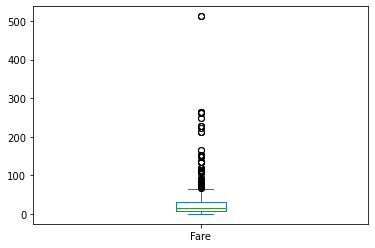

In [260]:
df1.Fare.plot.box()

In [261]:
# Calculate IQR (interquartile range)
q1=df1.Fare.quantile(0.25)
q3=df1.Fare.quantile(0.75)

iqr= q3-q1

# Calculate hte limit from lower and upper value
iqr_lower= q1 - 1.5*iqr
iqr_upper = q3 + 1.5*iqr

# The result
print(iqr_lower, iqr_upper)


-26.724 65.6344


In [262]:
# Checking lower outlier
df1[df1.Fare < iqr_lower]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi


In [263]:
# Checking upper outlier
df1[df1.Fare > iqr_upper].head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000,38.0,38.000000
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,19.000000,19.0,19.000000
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C,29.699118,28.0,27.915709


In [264]:
df1[df1.Fare > iqr_upper].shape


(116, 14)

There are 116 outlier at "Fare" column, in this case we use "mean" value to handle this problem

In [265]:
# Change the outlier value with NA
df1["Fare_iqr"]=df1["Fare"]
df1.loc[df1["Fare_iqr"] < iqr_lower , "Fare_iqr"] = pd.NA
df1.loc[df1["Fare_iqr"] > iqr_upper , "Fare_iqr"] = pd.NA


C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/1924980974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Fare_iqr"]=df1["Fare"]
C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [266]:
df1.Fare_iqr.isnull().sum()

116

C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


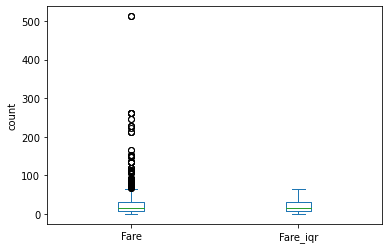

In [267]:
# input NaN with mean data
df1["Fare_iqr"].fillna(df1.Fare.mean(), inplace=True)

# Present the boxplot
df1[["Fare","Fare_iqr"]].plot.box()
plt.ylabel("count")
plt.show()

boxplot diatas merupakan visualisasi setelah dilakukan penginputan nilai outlier dengan nilai fare mean(yang sebelumnya sudah dimodifikasi dengan menghilangkan nilai outliernya)

array([[<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Fare_iqr'}>]], dtype=object)

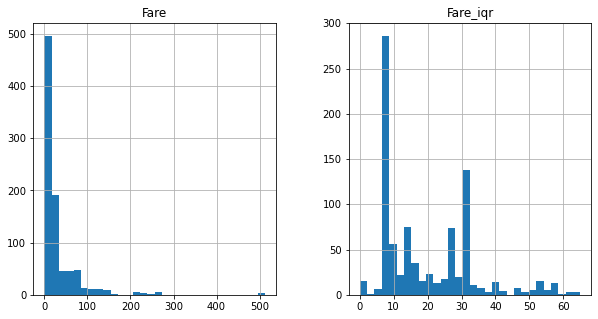

In [268]:
# Checking the skewness and visualize the data
df1[["Fare","Fare_iqr"]].hist(bins=30, figsize= (10,5))

In [269]:
# Skewness result
df1[["Fare","Fare_iqr"]].skew()

Fare        4.787317
Fare_iqr    0.987718
dtype: float64

### *Simpulan:* Be careful when using IQR

- Only use IQR when the distribution of data is tight
- Put more attention when implementing "IQR" because the outlier value maybe important for further analysis, and
- if we delete the outlier value, the model will be bias, and it's not good for modelling phase

## B. Outlier detection with "Multivariate" way

C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/2964112575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Fare_scaled"]= scaler.fit_transform(df1[["Fare"]])
C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/2964112575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age_scaled"] = scaler.fit_transform(df1[["Age_mean_uni"]])


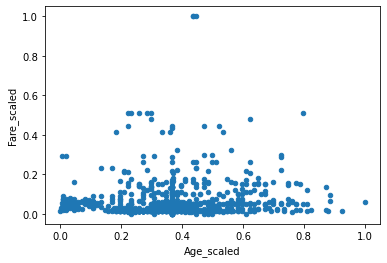

In [270]:
#load dictionary
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

#lakukan standarisasi data agar skalanya sama
scaler= MinMaxScaler()
df1["Fare_scaled"]= scaler.fit_transform(df1[["Fare"]])
df1["Age_scaled"] = scaler.fit_transform(df1[["Age_mean_uni"]])

#visualisasikan dua features ini dalam bentuk scatter
df1.plot.scatter(y= "Fare_scaled", x="Age_scaled")
plt.show()


In [271]:
DBSCAN_model = DBSCAN(eps=0.5, metric='euclidean', min_samples=3, n_jobs=-1)

#fit model
clusters= DBSCAN_model.fit_predict(df1[["Fare_scaled","Age_scaled"]])

# save the results
df1["Is_outlier"]= clusters



C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/3310262799.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Is_outlier"]= clusters


In [272]:
df1[df1["Is_outlier"]==1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1


There are 3 ("three") outliers from the data

In [273]:
#Creating dummy column
df1["Fare_dbscan"]= df1["Fare"]

C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/3358091334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Fare_dbscan"]= df1["Fare"]


## <b>Mean imputation:</b>

In [274]:
# get "mean" value from  "Fare"
fare_mean=df1[df1["Is_outlier"]==0].Fare.mean()

# Replace outlier with mean value
df1.loc[df1["Is_outlier"]==1, "Fare_dbscan"]=fare_mean

C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [275]:
# Checking "Fare_dbscan"
df1.loc[df1["Is_outlier"]==1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,36.0,36.0,36.0,32.204208,1.0,0.447097,1,30.582164
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,35.0,35.0,35.0,32.204208,1.0,0.434531,1,30.582164


<b>We assume that There are Human error input from the ticket data </b>

 Our assumtion, outlier value "52.3292" coming from wrong inputation and the real value is 51.2329


In [276]:
df1[df1["Embarked"]=="C"].sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean_uni,Age_median_uni,Age_mean_multi,Fare_iqr,Fare_scaled,Age_scaled,Is_outlier,Fare_dbscan
140,141,0.0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,C,29.699118,28.0,27.915709,15.245800,0.029758,0.367921,0,15.245800
308,309,0.0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,C,30.000000,30.0,30.000000,24.000000,0.046845,0.371701,0,24.000000
181,182,0.0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,C,29.699118,28.0,30.726645,15.050000,0.029376,0.367921,0,15.050000
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,35.000000,35.0,35.000000,32.204208,1.000000,0.434531,1,30.582164
114,115,0.0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,C,17.000000,17.0,17.000000,14.458300,0.028221,0.208344,0,14.458300


In [277]:
# Correction
df1.loc[df1["Is_outlier"]==1, "Fare_dbscan"]=51.2329

C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# <b>Feature Improvement</b>

1. Extract "Initial" column as a new feature

In [278]:
df1['Name'].sample(5)

216                        Honkanen, Miss. Eliina
858         Baclini, Mrs. Solomon (Latifa Qurban)
343    Sedgwick, Mr. Charles Frederick Waddington
611                         Jardin, Mr. Jose Neto
770                        Lievens, Mr. Rene Aime
Name: Name, dtype: object

In [279]:
df1["Initial"]=df1.Name.str.extract('(\w+)\.')

C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/2159309947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Initial"]=df1.Name.str.extract('(\w+)\.')


In [280]:
df1[["Initial"]].value_counts()

Initial 
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
dtype: int64

In [281]:
replace_dict={'Mlle':'Miss',
'Mme':'Mr',
'Ms':'Miss',
'Dr':'Mr',
'Major':'Mr',
'Lady':'Mrs',
'Countess':'Mrs',
'Jonkheer':'Other',
'Col':'Other',
'Rev':'Other',
'Capt':'Other',
'Sir' : 'Mr',
'Don':'Mr'}

df1["Initial"].replace(replace_dict, inplace= True)


C:\Users\yoga\miniconda3\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [282]:
df1.Initial.value_counts()

Mr        529
Miss      185
Mrs       127
Master     40
Other      10
Name: Initial, dtype: int64

## Grouping the passenger value based on "Age"
- 0-15 child
- 16-30 young dult
- 31-50 adult
- more 50 elderly

In [283]:
cut_points=[0,15,30,50,100]
age_label=["child","young adult", "adult", "elderly"]

# Implement new label with creating new column: "age_label"
df1['Age_group']=pd.cut(df1['Age_mean_multi'], bins=cut_points, labels=age_label, include_lowest=True)

C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/3551419369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_group']=pd.cut(df1['Age_mean_multi'], bins=cut_points, labels=age_label, include_lowest=True)


In [284]:
df1[["Age_group","Age_mean_multi"]].sample(5)

,Age_group,Age_mean_multi
327,adult,36.000000
611,adult,30.726645
406,elderly,51.000000
876,young adult,20.000000
485,young adult,27.915709


## Finalize the dataset

We use some functions:
- library labelEncoder
- dictionary
- df.Series.map()
- dst

### Kolom Sex

In [285]:
df1.Sex.unique()

array(['male', 'female'], dtype=object)

In [286]:
# Creating dictionary 
label_sex={'male':0,'female':1}

# Use "map" function to apply labelling
df1["Sex_enc"]=df1["Sex"].map(label_sex)

# Output
df1[["Sex","Sex_enc"]].head(3)

C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/1826022855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Sex_enc"]=df1["Sex"].map(label_sex)


,Sex,Sex_enc
0,male,0
1,female,1
2,female,1


### Embarked Column

In [287]:
#load library
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le=LabelEncoder()

#fitting dan transform the implementation results
df1["Embarked_enc"]=le.fit_transform(df1["Embarked"])

C:\Users\yoga\AppData\Local\Temp/ipykernel_11176/3155105206.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Embarked_enc"]=le.fit_transform(df1["Embarked"])


In [288]:
# Result
df1[["Embarked","Embarked_enc"]].sample(3)

,Embarked,Embarked_enc
7,S,2
131,S,2
527,S,2


# Initial Column

We use one hot encoding (OHE) method

In [289]:
from sklearn.preprocessing import OneHotEncoder

# Initiate OHE
ohc= OneHotEncoder(handle_unknown="ignore")

# Fit dan transform
new_features=ohc.fit_transform(df1[["Initial"]])

# Put to Dataframe
cols_name=[x for x in df1["Initial"].unique()]
df_initial_ohc=pd.DataFrame(new_features.toarray(), columns=cols_name)

df_initial_ohc.sample(3)

,Mr,Mrs,Miss,Master,Other
694,0.0,0.0,0.0,0.0,1.0
810,0.0,0.0,1.0,0.0,0.0
799,0.0,0.0,0.0,1.0,0.0


In [290]:
# Concat to the main dataset
df1=pd.concat([df1,df_initial_ohc], axis=1)

In [291]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_dbscan,Initial,Age_group,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,7.2500,Mr,young adult,0,2,0.0,0.0,1.0,0.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,71.2833,Mrs,adult,1,0,0.0,0.0,0.0,1.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,7.9250,Miss,young adult,1,2,0.0,1.0,0.0,0.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,53.1000,Mrs,adult,1,2,0.0,0.0,0.0,1.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,8.0500,Mr,adult,0,2,0.0,0.0,1.0,0.0,0.0


## Age group Column
We use One hot Encoding

In [292]:
#fit dan transform
new_features = ohc.fit_transform(df1[["Age_group"]])

# Put to the dataset, and the result:
cols_name = [x for x in df1["Age_group"].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)


,young adult,adult,elderly,child
890,1.0,0.0,0.0,0.0
39,0.0,1.0,0.0,0.0
336,0.0,0.0,0.0,1.0


In [293]:
# Join with the main dataset
df1 = pd.concat([df1, df_age_group_ohc], axis=1)


In [294]:
# Result
df1.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_enc,Mr,Mrs,Miss,Master,Other,young adult,adult,elderly,child
442,443,0.0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
396,397,0.0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,...,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
786,787,1.0,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### OHE process has done



In [295]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_enc,Mr,Mrs,Miss,Master,Other,young adult,adult,elderly,child
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modelling
We will use some models:
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Support Vector Machine's (SVM)
4. Decision Tree's


In [296]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [297]:
# Seperating the data into dependent and independent variables
X = df1[["Pclass", "SibSp", "Parch", "Fare_scaled", "Age_scaled", "Sex_enc", "Embarked_enc", "Mr", "Mrs", "Miss", "Master", "Other", "young adult", "adult", "elderly", "child"]]
y = df1['Survived']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [298]:
# LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is', accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       168
         1.0       0.75      0.78      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

[[142  26]
 [ 22  78]]
accuracy is 0.8208955223880597


In [299]:
# K-Nearest Neighbours
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is', accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       168
         1.0       0.76      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

[[145  23]
 [ 28  72]]
accuracy is 0.8097014925373134


In [300]:
# Support Vector Machine's
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is', accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       168
         1.0       0.78      0.73      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

[[147  21]
 [ 27  73]]
accuracy is 0.8208955223880597


In [301]:
# Decision Tree's
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is', accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       168
         1.0       0.72      0.66      0.69       100

    accuracy                           0.78       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.77      0.78      0.77       268

[[142  26]
 [ 34  66]]
accuracy is 0.7761194029850746
